In [2]:
from bxd.MultiBXDAnalysis import BXDAnalysis
import seaborn as sbn 
import matplotlib.pyplot as plt 
%matplotlib inline

In [3]:
traj_files = "/Users/Mike/Google Drive/PhD/BXD/applications/EVB_HF/solvent/jacobian_invert/bxd_runs/box_runs" \
             "/trajectories/equilibration_cat_stride_100.juj"
bounds_file = "/Users/Mike/Google Drive/PhD/BXD/applications/EVB_HF/solvent/jacobian_invert/bxd_runs/box_runs" \
              "/trajectories/bounds.json"

In [4]:
traj_files = []
prev_analysis = ["analysis"]
analysis = BXDAnalysis(traj_files, bounds_file, 2, prev_analysis_dir=prev_analysis)

In [5]:
analysis.read_bounds(max_distance = 0.1, x_cv_label = "C-D Distance", y_cv_label="F-D Distance");

Reading bounds from json file: /Users/Mike/Google Drive/PhD/BXD/applications/EVB_HF/solvent/jacobian_invert/bxd_runs/box_runs/trajectories/bounds.json
	Box  0  spans  [ 0.  -1.   2.8]  to  [ 0.008241 -0.999966  1.765369]
	Box  1  spans  [ 0.008241 -0.999966  1.765369]  to  [ 0.657069 -0.753831  0.126791]
	Box  2  spans  [ 0.657069 -0.753831  0.126791]  to  [ 0.882979 -0.469412 -0.72294 ]
	Box  3  spans  [ 0.882979 -0.469412 -0.72294 ]  to  [ 0.944706 -0.327919 -1.07584 ]
	Box  4  spans  [ 0.944706 -0.327919 -1.07584 ]  to  [ 0.995409 -0.095718 -1.488544]
	Box  5  spans  [ 0.995409 -0.095718 -1.488544]  to  [ 0.995837 -0.091154 -1.600396]
	Box  6  spans  [ 0.995837 -0.091154 -1.600396]  to  [ 0.998896 -0.046981 -1.762191]
	Box  7  spans  [ 0.998896 -0.046981 -1.762191]  to  [ 0.999964 -0.008429 -2.033019]
	Box  8  spans  [ 0.999964 -0.008429 -2.033019]  to  [ 0.999979 -0.006531 -2.424805]
	Box  9  spans  [ 0.999979 -0.006531 -2.424805]  to  [ 0.999999 -0.       -2.71813 ]
	Box  10  span

In [6]:
fpt_lower, fpt_upper, hist_counts = analysis.analyse(10)

Filling histogram from precomputed  histogram file  analysis/rawHistogram.txt
Getting passage times for all boxes from precomputed  FPT directory  analysis/FPT_arrays
Reading previously generated FPTs from directory:  analysis/FPT_arrays


FPTs outputted to analysis/FPT_arrays
Raw histogram printed out to rawHistogram.txt


In [7]:
# perform block analysis
import numpy as np

In [8]:
blocksizes = np.logspace(1, 5, 100, base=15)
blocksizes = np.concatenate([np.array([1,2,4,8]), np.array(blocksizes)])

In [69]:
import math

def block_analysis(fpt_array, blocksizes, color='C0'):
    block_sizes_done = set()
    block_errors = []
    # a small error will occur as block sizes are not totally consistent, but should not be major. 
    for block_size in blocksizes:
        num_blocks = int(len(fpt_array) / int(block_size))
        if num_blocks <= 10 or num_blocks in block_sizes_done:
            continue

        fpts = np.array(np.array_split(fpt_array, num_blocks))
        
        block_means = [block.mean() for block in fpts]
        assert len(block_means) == num_blocks
        overall_mean = np.array(block_means).mean()
        block_var = sum([math.pow(block_mean - overall_mean, 2) for block_mean in block_means]) / (num_blocks + 1)
        err = math.sqrt(block_var / num_blocks)
        block_errors.append((block_size, err, overall_mean))
        block_sizes_done.add(num_blocks)
    block_errors = np.array(block_errors)
    fig = plt.figure()
    plt.errorbar(block_errors[:, 0], block_errors[:, 2], block_errors[:, 1], color=color)
    
    plt.xlabel("Block Length")
    plt.ylabel("MFTP (ps)")
    return block_errors

Calculating errors for box 0


Calculating errors for box 1


Calculating errors for box 2


Calculating errors for box 3


Calculating errors for box 4


Calculating errors for box 5


Calculating errors for box 6


Calculating errors for box 7


Calculating errors for box 8


Calculating errors for box 9


Calculating errors for box 10


/Users/Mike/anaconda/lib/python3.5/site-packages/matplotlib/pyplot.py:528: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


Calculating errors for box 11


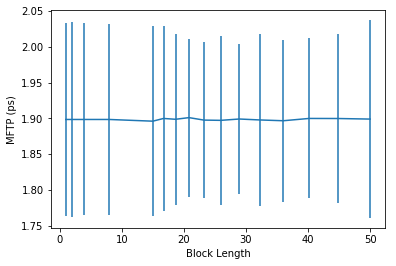

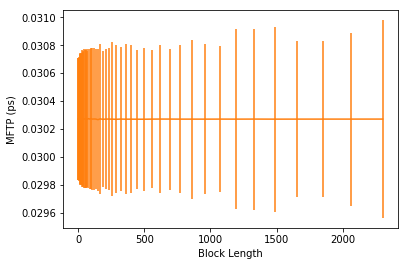

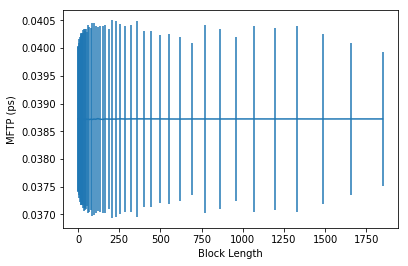

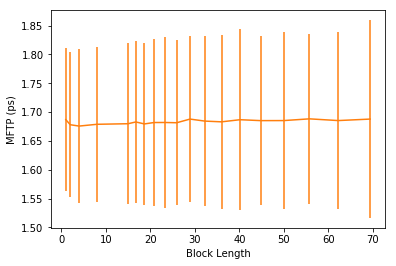

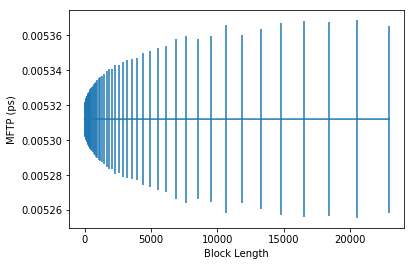

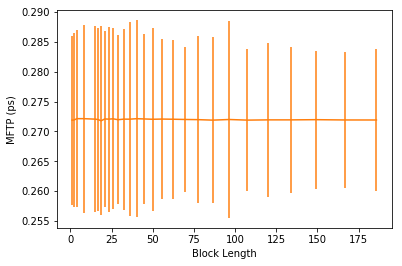

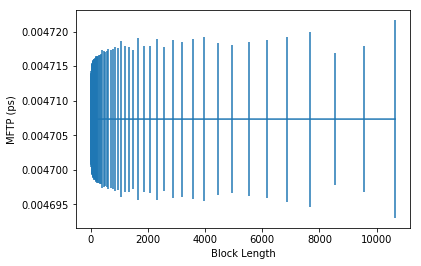

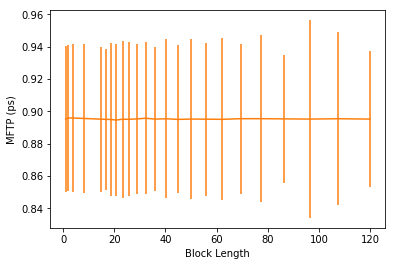

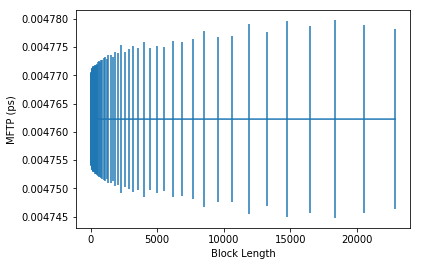

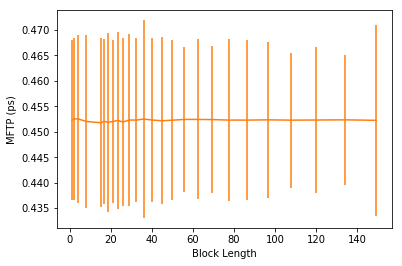

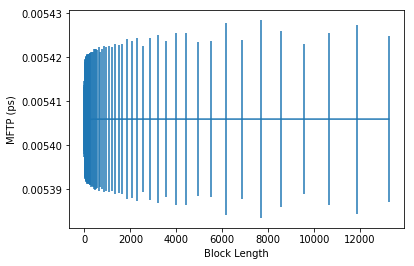

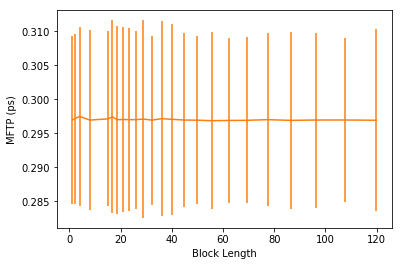

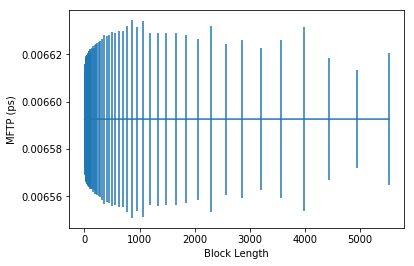

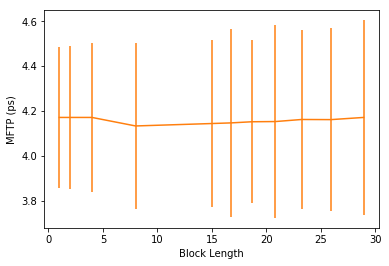

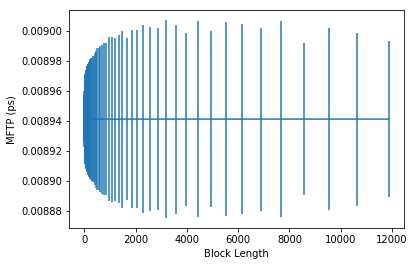

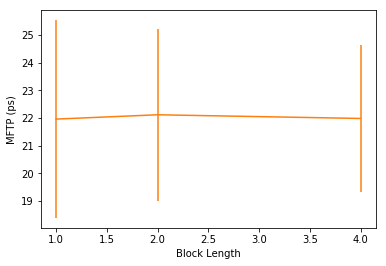

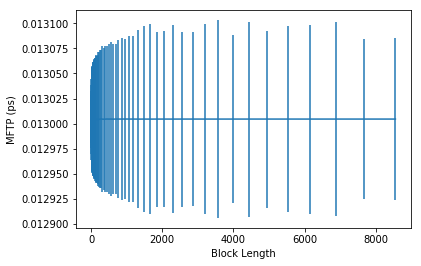

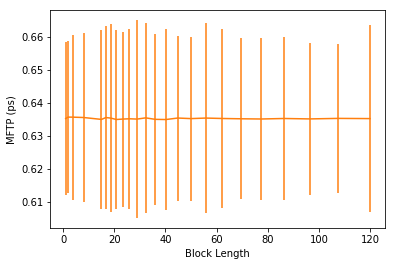

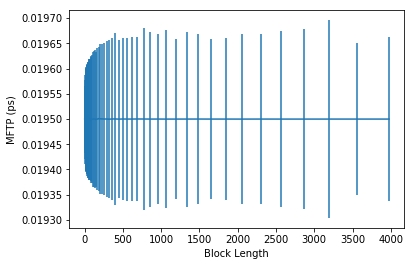

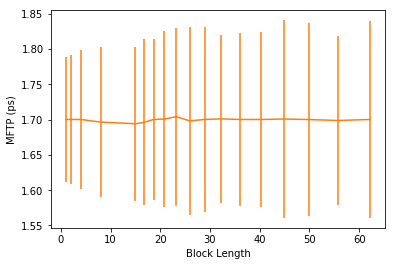

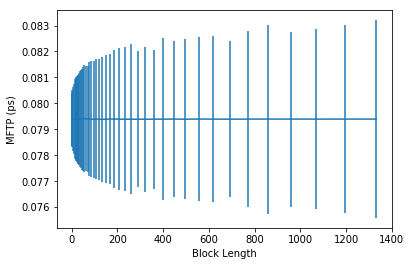

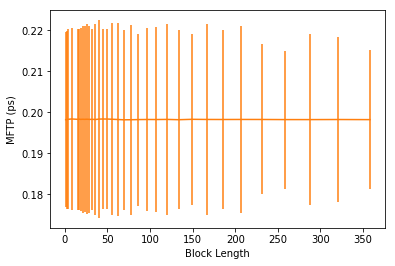

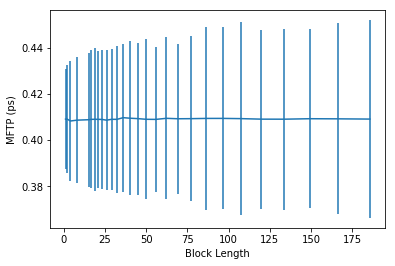

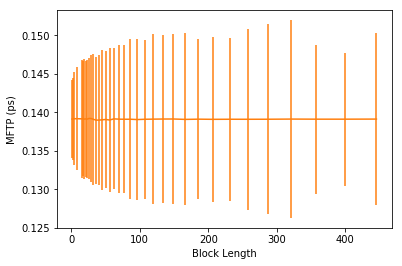

In [70]:
errors_upper = []
errors_lower = []
for box in range(len(fpt_upper) - 1):
    print('Calculating errors for box {}'.format(box))
    # convert to ps
    ufpts = np.array(fpt_upper[box])[:, 1] * 0.1 * 0.001
    lfpts = np.array(fpt_lower[box + 1])[:, 1] * 0.1 * 0.001
    
    #n_samples = 200
    #ufpts = ufpts[np.random.choice(ufpts.shape[0], n_samples, replace=True)]
    #lfpts = lfpts[np.random.choice(lfpts.shape[0], n_samples, replace=True)]
    err_upper = block_analysis(ufpts, blocksizes) 
    errors_upper.append(err_upper)
    
    err_lower = block_analysis(lfpts, blocksizes, color="C1") 
    errors_lower.append(err_lower)

In [71]:
# take the error as the max of the block analysis errors: 
std_fwd = [max(error[:,1]) for error in errors_upper]
std_bwd = [max(error[:,1]) for error in errors_lower]
print(std_fwd)

[0.13819425616960762, 0.001782223229762719, 5.655581687134058e-05, 1.4294271323535758e-05, 1.7461095353339442e-05, 2.2493032189412746e-05, 4.180157375567814e-05, 6.600849476106981e-05, 9.83837491150772e-05, 0.0001958798080606963, 0.0038098284232106353, 0.04279520800815191]


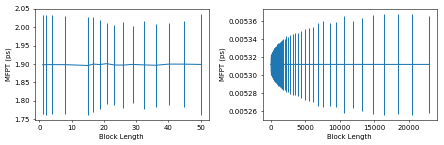

In [84]:
fig, (ax, ax2) = plt.subplots(1, 2, figsize=(9,3), dpi=50)

ax.errorbar(np.array(errors_upper)[0][:, 0], np.array(errors_upper)[0][:, 2], np.array(errors_upper)[0][:, 1], color="C0")
ax.set_ylabel("MFPT (ps)")
ax.set_xlabel("Block Length")
ax2.errorbar(np.array(errors_upper)[2][:, 0], np.array(errors_upper)[2][:, 2], np.array(errors_upper)[2][:, 1], color="C0")
ax2.set_ylabel("MFPT (ps)")
ax2.set_xlabel("Block Length")

plt.tight_layout()
plt.savefig("/Users/Mike/Google Drive/PhD/Thesis/tex/bxd/images/cd3cn/mfpt_block_correlation.pdf")
plt.show()

##Produce nice box plots with the new errors

In [12]:
import pandas as pd
max_box = len(fpt_upper) - 1
allBoxes = pd.DataFrame()
mfpts_fwd = []
mfpts_bwd = []
for box in range(0, max_box):
    fwd_fpts = pd.DataFrame({"FPT": np.array(fpt_upper[box])[:,1]})
    fwd_fpts = fwd_fpts.assign(Direction="Forward", Box=box)
    
    bkd_fpts = pd.DataFrame({"FPT": np.array(fpt_lower[box+1])[:,1]})
    bkd_fpts = bkd_fpts.assign(Direction="Backward", Box=box)
    
    # multiply by 0.1 for fs, then 0.001 for ps
    fwd_fpts['FPT'] = fwd_fpts['FPT'].apply(lambda x: x * 0.1 * 0.001)   
    bkd_fpts['FPT'] = bkd_fpts['FPT'].apply(lambda x: x * 0.1 * 0.001) 
    
     
    mfpts_fwd.append(np.mean(fwd_fpts["FPT"]))
    mfpts_bwd.append(np.mean(bkd_fpts["FPT"]))
    
    allBoxes = pd.concat([allBoxes, fwd_fpts, bkd_fpts])

In [13]:
mdf = pd.melt(allBoxes, id_vars=['Box', 'Direction'], value_vars=['FPT'], value_name='FPT (ps)')
mdf.head()

,Box,Direction,variable,FPT (ps)
0,0,Forward,FPT,0.0094
1,0,Forward,FPT,0.3800
2,0,Forward,FPT,0.4950
3,0,Forward,FPT,0.0172
4,0,Forward,FPT,0.0053


In [14]:
# calculate the error
box_rates_var = [math. pow(m_b / m_f, 2)*(math.pow(s_f/ m_f, 2) + math.pow(s_b / m_b, 2)) for m_f, s_f, m_b, s_b in zip(mfpts_fwd, std_fwd, mfpts_bwd, std_bwd)]
box_rates_std = [math.sqrt(x) for x in box_rates_var]
box_rates_std

[0.0012193345104019554,
 5.982694567182828,
 3.195986739122178,
 13.001736783418687,
 4.092440202992229,
 2.6976577782682925,
 74.31912732768528,
 400.13664996680814,
 2.404098454504895,
 8.948622411584745,
 0.3350179322967907,
 0.050929603830322]

In [15]:
box_rate = [ m_b / m_f for m_f, m_b in zip(mfpts_fwd, mfpts_bwd)]
inv_rates = [ 1 / rate for rate in box_rate]
print(box_rate)

[0.01594581818747717, 43.56549698689575, 51.18405932962726, 190.17435023205857, 94.97434687592025, 54.924436561463054, 632.6960569809557, 2456.162518540201, 48.849580084475235, 87.19361239143562, 2.496970000920772, 0.34007980967810536]


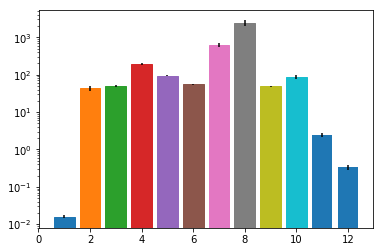

In [16]:
rates = pd.DataFrame({'Box': range(len(box_rate)), 'Rate': box_rate, 'Inverse Rate': inv_rates, 'Error': box_rates_std })
from matplotlib.colors import ListedColormap
palette = sbn.color_palette()
fig, ax = plt.subplots()
barlist = ax.bar([x + 1 for x in range(len(box_rate))],box_rate, yerr=box_rates_std)
for bar, color in zip(barlist, palette):
    bar.set_color(color)
ax.set_yscale('log')
plt.show()

In [17]:
## Calculate error on box free energies

In [18]:
box_free_energy_var = [math.pow(1 / m_f, 2)*math.pow(s_f, 2) + math.pow(1 / m_b, 2)*math.pow(s_b, 2) for m_f, s_f, m_b, s_b in zip(mfpts_fwd, std_fwd, mfpts_bwd, std_bwd)]
print(box_free_energy_var)

# compute standard error of each box free energy difference
box_energy_std = [math.sqrt(v) for v in box_free_energy_var]
# compute cumulative box_free_energy std deviation.
# via sqrt of summation of previous square of error for each box
box_energy_std_cuml = np.array([math.sqrt(v) for v in np.cumsum(box_free_energy_var)])
box_energy_std_cuml =  np.insert(box_energy_std_cuml, 0, 0)
# convert to kcal/mol.
box_energy_std_cuml = 0.5961612401 * box_energy_std_cuml
print(box_energy_std_cuml)

[0.005847256095795365, 0.018858550865487936, 0.0038988855334730114, 0.004674109228001604, 0.001856744103898425, 0.002412362054667604, 0.013797834995987272, 0.02654009446142736, 0.00242204846363921, 0.010532780298031421, 0.01800153164990001, 0.022427398404118705]
[0.         0.04558687 0.09370511 0.10082828 0.10875459 0.11174731
 0.11551985 0.13508775 0.16637688 0.16894402 0.17968172 0.19668099
 0.21599605]


In [19]:
box_free_energy_diff = [-1.0 * math.log(Keq) for Keq in box_rate]
print('free energy diffs:', box_free_energy_diff)
box_free_energy = np.cumsum(box_free_energy_diff)
box_free_energy = np.insert(box_free_energy, 0, 0)
# conver to kcal / mol
box_free_energy = 0.5961612401 * box_free_energy
print(box_free_energy)

free energy diffs: [4.1385586667304635, -3.774265483557943, -3.9354281423505055, -5.247941284193203, -4.553606822250047, -4.005958359892396, -6.449990144081824, -7.806355459121816, -3.888745782432915, -4.468131075840053, -0.9150779971769175, 1.0785749545703576]
[  0.           2.46724827   0.21717748  -2.12897225  -5.25759143
  -7.97227532 -10.36047242 -14.20570655 -18.8595531  -21.17787261
 -23.84159917 -24.3871332  -23.74412862]


<Container object of 3 artists>

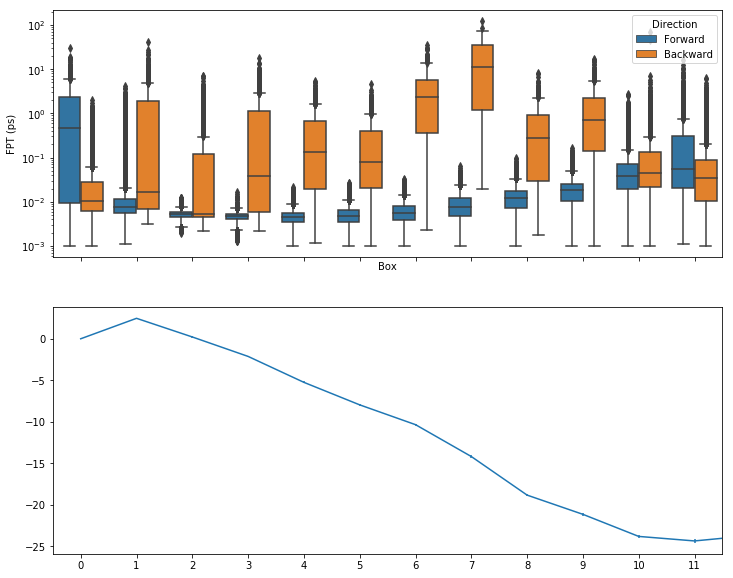

In [20]:
f, (ax1, ax2) = plt.subplots(2, figsize=(12,10), sharex=True)
ax = sbn.boxplot(x = "Box", y="FPT (ps)",  hue="Direction", data=mdf, ax=ax1)
ax.set_yscale('log')
ax2.errorbar([x for x in range(len(box_rate)+1)], box_free_energy, yerr=box_energy_std_cuml)

std fwd: {0} 


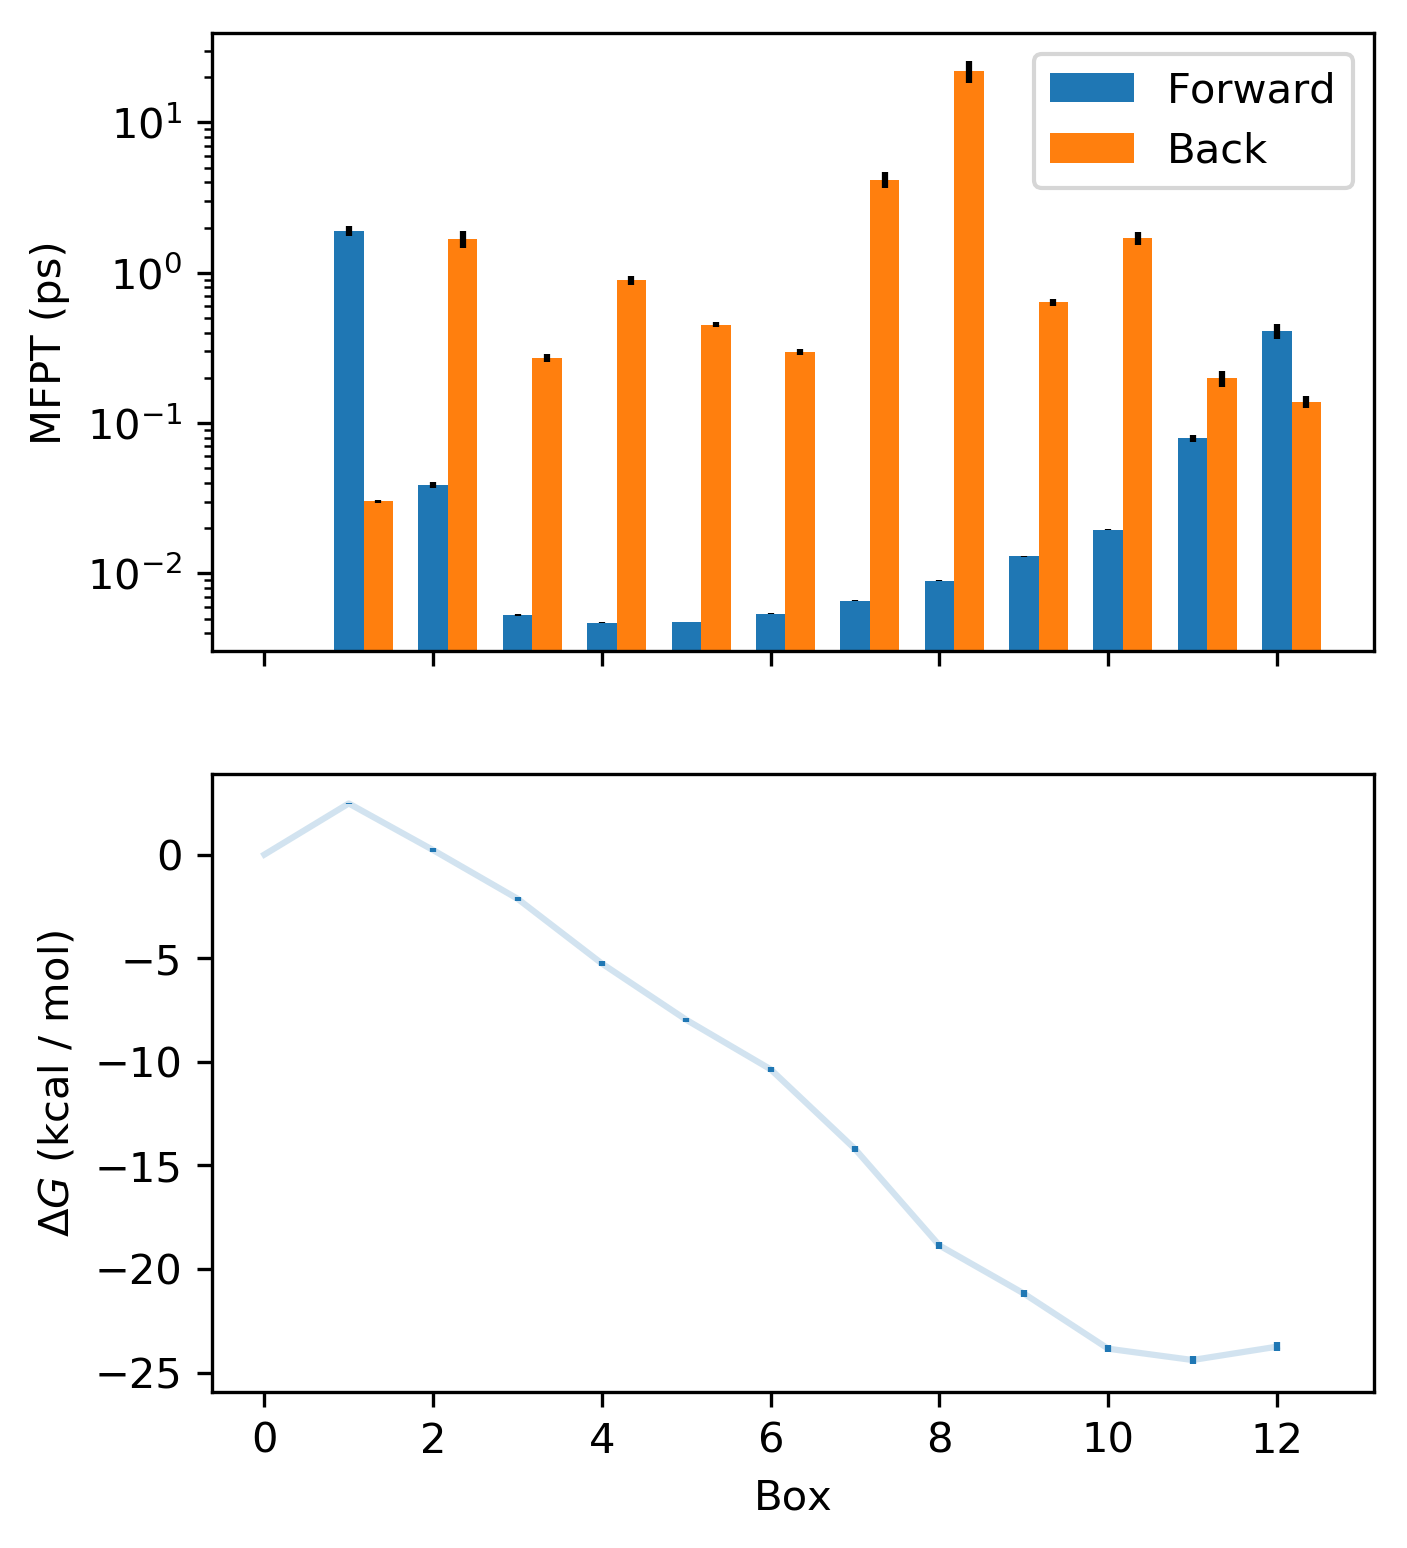

In [64]:
rates = pd.DataFrame({'Box': range(len(box_rate)), 'Rate': box_rate, 'Inverse Rate': inv_rates, 'Error': box_rates_std })
from matplotlib.colors import ListedColormap
palette = sbn.color_palette()
fig, (ax, ax2) = plt.subplots(2, figsize=(5,6), sharex=True, dpi=300)
ind = np.array([x + 1 for x in range(len(mfpts_fwd))])
width = 0.35
barlist = ax.bar(ind, mfpts_fwd, width, yerr=std_fwd, label='Forward')
print('std fwd: {0} ')
p2 = ax.bar(ind + width, mfpts_bwd, width, yerr=std_bwd, label='Back')
ax.set_ylabel("MFPT (ps)")
ax.set_yscale('log')
ax.legend()

ax2.errorbar([x for x in range(len(box_free_energy))], box_free_energy, yerr=box_energy_std_cuml, ls='None')
ax2.plot([x for x in range(len(box_free_energy))], box_free_energy, alpha=0.2, c="C0")
ax2.set_xlabel("Box")
ax2.set_ylabel(r'$\Delta G$ (kcal / mol)')
plt.savefig("/Users/Mike/Google Drive/PhD/Thesis/tex/bxd/images/cd3cn/box_errors.pdf")
plt.show()

In [61]:
for i, (energy, error) in enumerate(zip(box_free_energy, box_energy_std)):
    print('Box {0} free energy {1} +- {2}'.format(i, energy, error))

Box 0 free energy 0.0 +- 0.0764673531371092
Box 1 free energy 2.467248266984636 +- 0.13732643906214104
Box 2 free energy 0.2171774758401064 +- 0.062441056473069155
Box 3 free energy -2.1289722458280105 +- 0.06836745737557895
Box 4 free energy -5.257591429784617 +- 0.04308995363072958
Box 5 free energy -7.972275319865026 +- 0.04911580249438671
Box 6 free energy -10.360472423487439 +- 0.117464186014237
Box 7 free energy -14.205706546416037 +- 0.16291130857441222
Box 8 free energy -18.859553097587504 +- 0.04921431157335445
Box 9 free energy -21.177872605676352 +- 0.10262933449083367
Box 10 free energy -23.841599168778508 +- 0.13416978665072107
Box 11 free energy -24.387133202363724 +- 0.14975779914287837
